# Data Preprocessing
---

* KNU data

In [1]:
import os

os.sys.path.append(r'/docker_mnt/data5/jin/jin/python/')

os.sys.path

['/docker_mnt/data4/sgcwhb/Malocclusion/preprocessing',
 '/docker_mnt/data4/sgcwhb/Malocclusion/preprocessing',
 '/docker_mnt/jin/jin/python',
 '/root/miniconda3/lib/python37.zip',
 '/root/miniconda3/lib/python3.7',
 '/root/miniconda3/lib/python3.7/lib-dynload',
 '',
 '/root/miniconda3/lib/python3.7/site-packages',
 '/root/miniconda3/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython',
 '/docker_mnt/data5/jin/jin/python/']

In [2]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13304158755864362685,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3952691612228364842
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 137625600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3088720001583842937
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1021087480634838364
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
import glob
import os
import pprint
from tqdm import tqdm
from sklearn.utils import Bunch

from IPython import display
import ipywidgets as widgets

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

import cv2 as cv

In [4]:
from jin import jin_utils

%load_ext version_information
%version_information matplotlib, numpy, pandas, seaborn, cv2, skimage

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.13.0
OS Linux 5.4.0 52 generic x86_64 with debian buster sid
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.3
seaborn 0.10.1
cv2 3.4.2
skimage 0.16.2
Fri Jan 29 01:51:57 2021 UTC

## Dental Model Images with Angle Class
---

* Images processed by Diorco labeling SW

### Paths
---

In [5]:
import os
import glob

In [6]:
data_path_root = '../data/'

data_paths_deid = glob.glob(os.path.join(data_path_root, r'*_DeID'))
data_paths_deid = sorted(data_paths_deid)

print(data_paths_deid)
#jin_utils.print_paths(data_paths_deid)

data_paths_diorco = glob.glob(os.path.join(data_path_root, r'*_Diorco'))
data_paths_diorco = sorted(data_paths_diorco)

print(data_paths_diorco)
#jin_utils.print_paths(data_paths_diorco)

label_paths = glob.glob(os.path.join(data_path_root, '*_DeID/label*'))
label_paths = sorted(label_paths)

print(label_paths)
#jin_utils.print_paths(label_paths)

['../data/data_KNU_2020-08-14_DeID', '../data/data_KNU_2020-08-31_DeID', '../data/data_KNU_2020-09-10_DeID', '../data/data_KNU_2020-09-17_DeID', '../data/data_KNU_2020-09-27_DeID', '../data/data_KNU_2020-09-28_DeID']
['../data/data_KNU_2020-08-14_Diorco', '../data/data_KNU_2020-08-31_Diorco', '../data/data_KNU_2020-09-10_Diorco', '../data/data_KNU_2020-09-17_Diorco', '../data/data_KNU_2020-09-27_Diorco', '../data/data_KNU_2020-09-28_Diorco']
['../data/data_KNU_2020-08-14_DeID/label.xlsx', '../data/data_KNU_2020-08-31_DeID/label.xlsx', '../data/data_KNU_2020-09-10_DeID/label.xlsx', '../data/data_KNU_2020-09-17_DeID/label.xlsx', '../data/data_KNU_2020-09-27_DeID/label.xlsx', '../data/data_KNU_2020-09-28_DeID/label.xlsx']


In [7]:
data_paths_deid

['../data/data_KNU_2020-08-14_DeID',
 '../data/data_KNU_2020-08-31_DeID',
 '../data/data_KNU_2020-09-10_DeID',
 '../data/data_KNU_2020-09-17_DeID',
 '../data/data_KNU_2020-09-27_DeID',
 '../data/data_KNU_2020-09-28_DeID']

In [8]:
data_paths_diorco

['../data/data_KNU_2020-08-14_Diorco',
 '../data/data_KNU_2020-08-31_Diorco',
 '../data/data_KNU_2020-09-10_Diorco',
 '../data/data_KNU_2020-09-17_Diorco',
 '../data/data_KNU_2020-09-27_Diorco',
 '../data/data_KNU_2020-09-28_Diorco']

In [9]:
label_paths

['../data/data_KNU_2020-08-14_DeID/label.xlsx',
 '../data/data_KNU_2020-08-31_DeID/label.xlsx',
 '../data/data_KNU_2020-09-10_DeID/label.xlsx',
 '../data/data_KNU_2020-09-17_DeID/label.xlsx',
 '../data/data_KNU_2020-09-27_DeID/label.xlsx',
 '../data/data_KNU_2020-09-28_DeID/label.xlsx']

### Hyper-parameters
---

In [10]:
params = Bunch(resize_wh = (1920, 1039),
               crop_row_range = (332, 812),
               crop_col_size_half = 2**4 * 11)

for k, v in params.items():
    print(f'{k}: {v}')

resize_wh: (1920, 1039)
crop_row_range: (332, 812)
crop_col_size_half: 176


### Images
---

In [11]:
img_paths_list = []

for data_path_diorco in data_paths_diorco:
    img_paths = glob.glob(os.path.join(data_path_diorco, r'*_SO_reori_pt.jpg'))
#     img_paths = sorted(img_paths)
    
    print(len(img_paths))
    img_paths_list.extend(img_paths)
else:
    img_paths = img_paths_list
    del img_paths_list
    img_paths = sorted(img_paths)
    
    print(img_paths)

200
620
730
212
146
166
['../data/data_KNU_2020-08-14_Diorco/QH0026_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0026_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0041_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0041_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0044_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0044_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0059_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0059_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0067_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0067_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0070_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0070_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0083_01A1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-08-14_Diorco/QH0083_02B1SU_SO_reori_pt.jpg', '../data/data_KNU_2020-

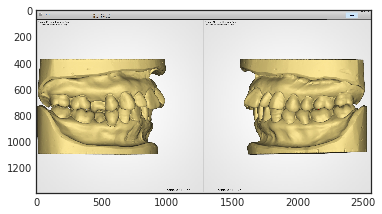

In [12]:
img = cv.imread(img_paths[0])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()

plt.imshow(img)

plt.show()

### Labels
---

(200, 6)
(620, 6)
(730, 6)
(212, 6)
(146, 6)
(166, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     2074 non-null   object 
 1   tx_phase       2074 non-null   object 
 2   angle_class_r  2074 non-null   int64  
 3   angle_class_l  2074 non-null   int64  
 4   distance(r)    2034 non-null   float64
 5   distance(l)    2032 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 97.3+ KB


None

,patient_id,tx_phase,angle_class_r,angle_class_l,distance(r),distance(l)
0,QH0026,Pre-Tx,1,1,1.48,1.23
1,QH0026,Post-Tx,1,2,1.22,2.10
2,QH0041,Pre-Tx,2,1,2.57,0.88
3,QH0041,Post-Tx,2,1,3.58,1.05
4,QH0044,Pre-Tx,2,2,6.94,4.63
...,...,...,...,...,...,...
2069,QH1058,Post-Tx,1,1,2.00,1.00
2070,QH1072,Pre-Tx,3,3,-4.99,-2.83
2071,QH1072,Post-Tx,2,2,7.41,5.26
2072,QH1084,Pre-Tx,1,3,-0.55,-0.55


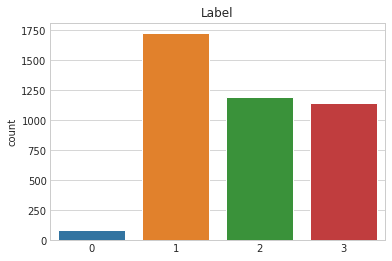

In [13]:
label_df_list = []

for label_path in label_paths:

#     label_df = pd.read_excel(label_path,
#                          usecols=['Project_id', 'Tx', 'Phase', 'Angle_Class_Type_Right', 'Angle_Class_Type_Left'])

    label_df = pd.read_excel(label_path,
                         usecols=['Project_id', 'Phase', 'Angle_Class_Type_Right', 'Angle_Class_Type_Left','Angle_Distance_Right(mm)', 'Angle_Distance_Left(mm)'])
    
    print(label_df.shape)
    
    # Fill empty cells.
    for row_idx, project_id in enumerate(label_df.Project_id):
        if row_idx % 2 == 0:
            project_id_temp = project_id
        else:
            label_df.iloc[row_idx, 0] = project_id_temp
            
    label_df_list.append(label_df)
else:
    label_df = pd.concat(label_df_list)
    del(label_df_list)

    
    


    label_df.rename(columns={'Project_id': 'patient_id',
                             'Phase': 'tx_phase',
                             'Angle_Class_Type_Right': 'angle_class_r',
                             'Angle_Class_Type_Left': 'angle_class_l',
                            'Angle_Distance_Right(mm)':'distance(r)',
                             'Angle_Distance_Left(mm)':'distance(l)'
                            },
                    inplace=True)
    

    
    
    
    label_df.reset_index(drop=True, inplace=True)
    
    # Change some values.
    label_df.loc[label_df.tx_phase == 'Pre-treatment', 'tx_phase'] = 'Pre-Tx'
    label_df.loc[label_df.tx_phase == 'Post-treatment', 'tx_phase'] = 'Post-Tx'
    
    display.display(label_df.info())
    display.display(label_df)
    
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    
    plt.title('Label')
    sns.countplot(np.concatenate([label_df.angle_class_r, label_df.angle_class_l]))

    plt.show()

### Preprocessing
---

100%|██████████| 2074/2074 [03:16<00:00, 10.57it/s]


uint8 (2009, 480, 784, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     2009 non-null   object 
 1   tx_phase       2009 non-null   object 
 2   angle_class_r  2009 non-null   int64  
 3   angle_class_l  2009 non-null   int64  
 4   distance(r)    2009 non-null   float64
 5   distance(l)    2009 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 94.3+ KB


None

,patient_id,tx_phase,angle_class_r,angle_class_l,distance(r),distance(l)
0,QH0026,Pre-Tx,1,1,1.48,1.23
1,QH0026,Post-Tx,1,2,1.22,2.10
2,QH0041,Pre-Tx,2,1,2.57,0.88
3,QH0041,Post-Tx,2,1,3.58,1.05
4,QH0044,Pre-Tx,2,2,6.94,4.63
...,...,...,...,...,...,...
2004,QH1058,Post-Tx,1,1,2.00,1.00
2005,QH1072,Pre-Tx,3,3,-4.99,-2.83
2006,QH1072,Post-Tx,2,2,7.41,5.26
2007,QH1084,Pre-Tx,1,3,-0.55,-0.55


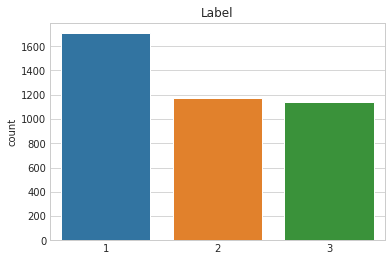

In [14]:
imgs = []
label_df_list = []

for img_path in tqdm(img_paths):
    data_info = os.path.basename(img_path)[:11]
    patient_id = data_info.split('_')[0]

    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    if img.size > (params.resize_wh[0] * params.resize_wh[1]):
        img = cv.resize(img, params.resize_wh, interpolation=cv.INTER_AREA)
    else:
        print(f'{img_path}: Image size should be larger than ({params.resize_wh[1]}, {params.resize_wh[0]}).')
        raise
    
    col_idx_half = img.shape[1] // 2

    img = img[params.crop_row_range[0]:params.crop_row_range[1]]
    img_r = img[:, : col_idx_half - params.crop_col_size_half]
    img_l = img[:, col_idx_half + params.crop_col_size_half :]
    img_l = np.fliplr(img_l)
    img = np.concatenate((img_r, img_l), axis=2)

    if data_info[-2] == 'A':
        bool_mask = (label_df.patient_id == patient_id) & (label_df.tx_phase == 'Pre-Tx')
    elif data_info[-2] == 'B':
        bool_mask = (label_df.patient_id == patient_id) & (label_df.tx_phase == 'Post-Tx')
    label = [int(label_df[bool_mask].angle_class_r),
             int(label_df[bool_mask].angle_class_l)]
    
    # DEBUG:
#    print(f'{data_info}: {img.shape}, {label}')
    
    if 0 in label:
        continue
    
    imgs.append(img)
    label_df_list.append(label_df[bool_mask])
    
    
else:
    imgs = np.asarray(imgs)
    label_df = pd.concat(label_df_list)
    del label_df_list
    label_df.reset_index(drop=True, inplace=True)
    
    print(imgs.dtype, imgs.shape)
    print()
    display.display(label_df.info())
    display.display(label_df)
    print()

    
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    
    plt.title('Label')
    sns.countplot(np.concatenate([label_df.angle_class_r, label_df.angle_class_l]))

    plt.show()
    plt.style.use('seaborn-white')
    

In [15]:
imgs.shape

(2009, 480, 784, 6)

In [22]:
imgs_B = imgs[:1550,...]
imgs_B.shape
label_df_B = label_df[:1550]
label_df_B

,patient_id,tx_phase,angle_class_r,angle_class_l,distance(r),distance(l)
0,QH0026,Pre-Tx,1,1,1.48,1.23
1,QH0026,Post-Tx,1,2,1.22,2.10
2,QH0041,Pre-Tx,2,1,2.57,0.88
3,QH0041,Post-Tx,2,1,3.58,1.05
4,QH0044,Pre-Tx,2,2,6.94,4.63
...,...,...,...,...,...,...
1545,QH1262,Pre-Tx,2,1,1.46,0.41
1546,QH1262,Post-Tx,1,3,0.88,-0.46
1547,QH1263,Pre-Tx,2,2,4.38,3.92
1548,QH1263,Post-Tx,2,1,2.80,1.70


In [23]:
np.save('../data/input_data/1550data.npy', imgs_B)
label_df.to_csv('../data/input_data/1550label.csv', index=False)

In [43]:
np.save('../data/hyg_input_data/data_KNU_Diorco_so_imgs_pt.npy', imgs)
label_df.to_csv('../data/hyg_input_data/data_Diorco_label.csv', index=False)

In [28]:
print('distance(r) range')
print(label_df['distance(r)'].max())
print(label_df['distance(r)'].min())
print('distance(l) range')
print(label_df['distance(l)'].max())
print(label_df['distance(l)'].min())

distance(r) range
14.35
-13.41
distance(l) range
25.12
-24.48


In [116]:
threshold_distance = 14

In [117]:
outlier_data =label_df[(label_df['distance(l)']>threshold_distance)|(label_df['distance(r)']>threshold_distance)|(label_df['distance(l)']<-int(threshold_distance))|(label_df['distance(r)']<-int(threshold_distance))]
outlier_data

,patient_id,tx_phase,angle_class_r,angle_class_l,distance(r),distance(l)
244,QH0579,Pre-Tx,2,2,3.13,25.12
439,QH0852,Pre-Tx,3,3,-9.33,-24.48
603,QH1014,Post-Tx,2,2,7.96,14.50
684,QH1102,Pre-Tx,3,2,-1.09,14.50
1538,QH1257,Post-Tx,2,3,14.35,-9.39


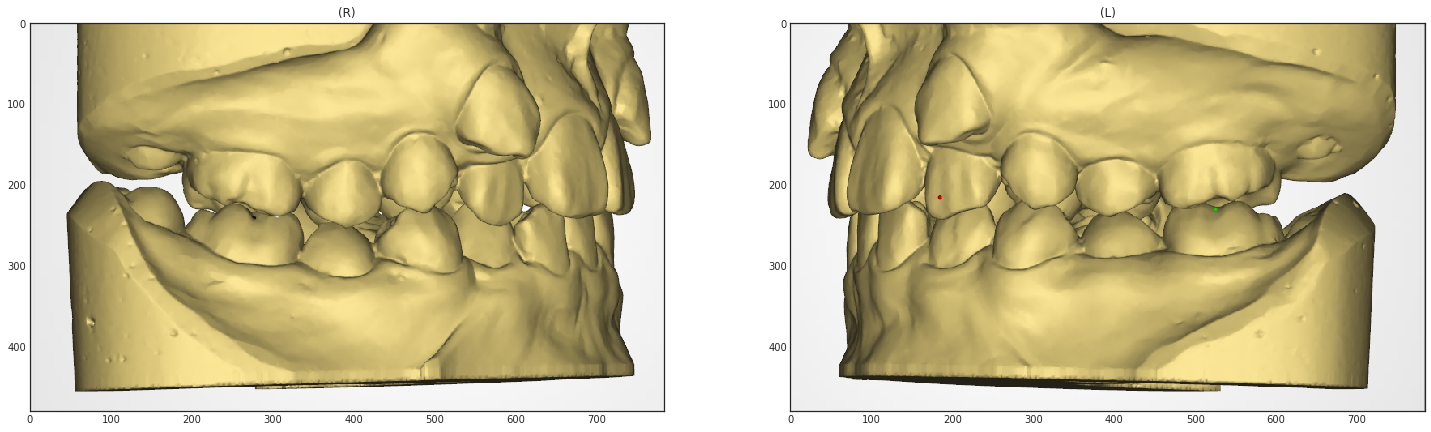

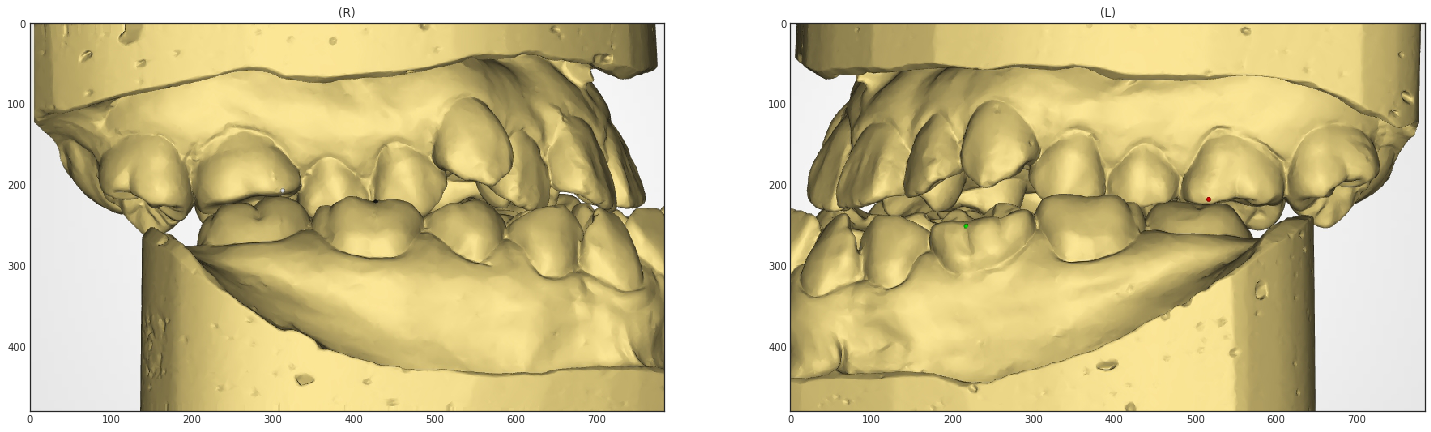

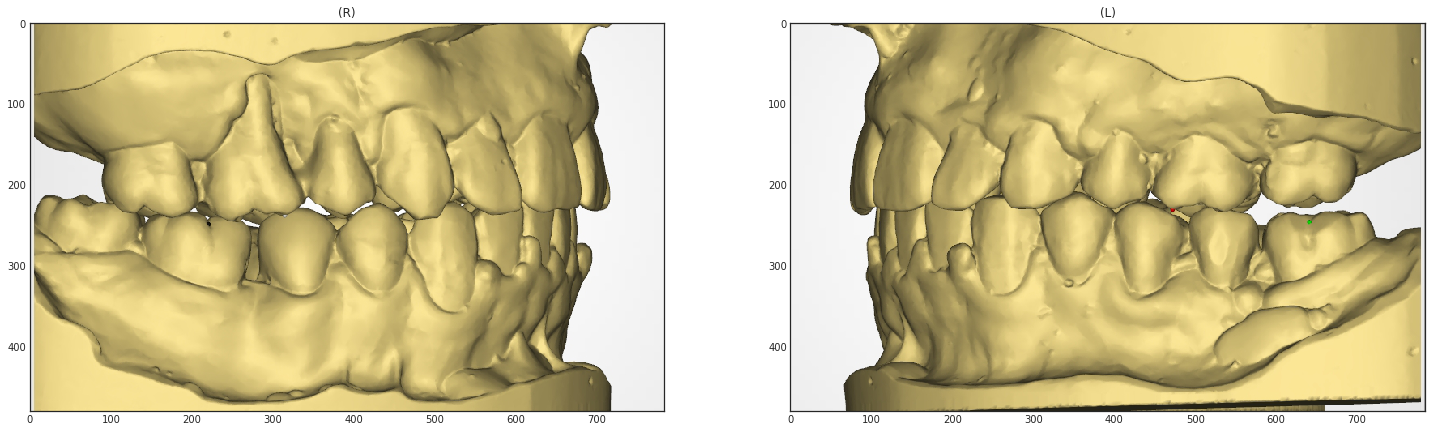

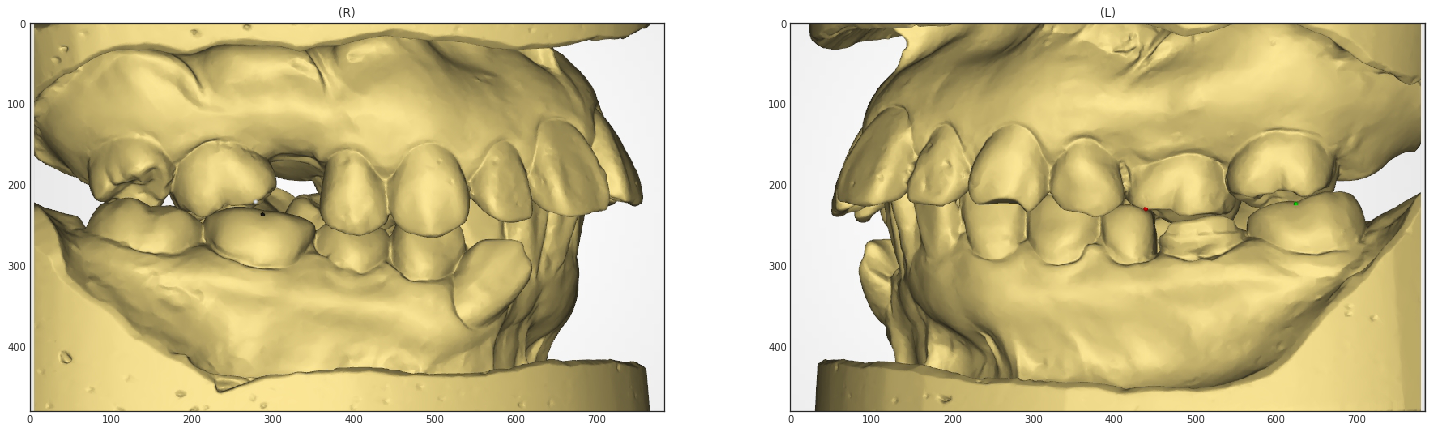

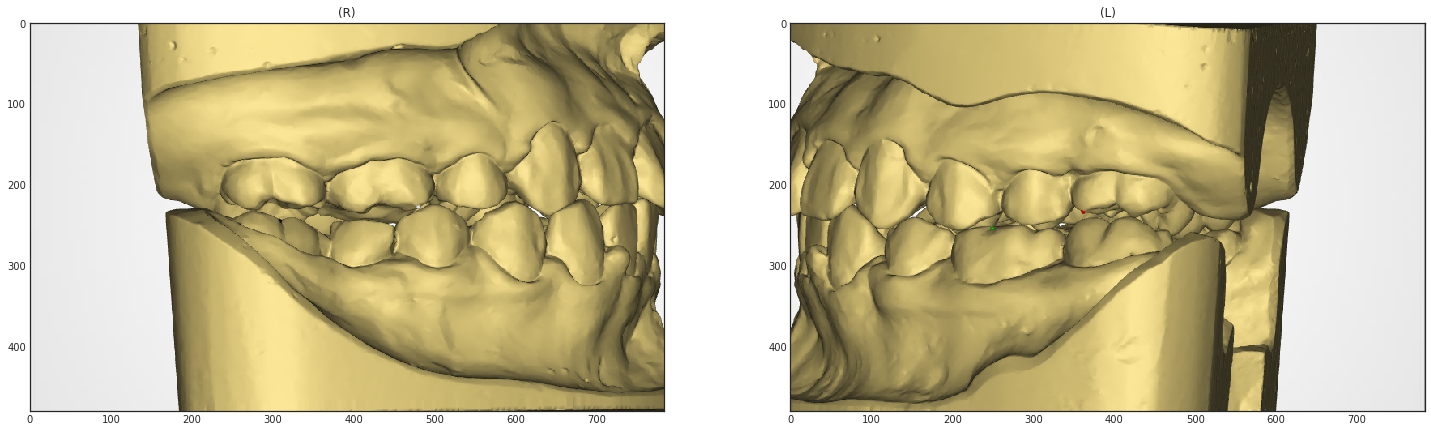

In [118]:
idx= np.array(outlier_data.index)
idx = idx[0:20]
for i in idx:
    plt.figure(figsize=(25, 13))

    plt.subplot(121)
    plt.title('(R)')
    plt.imshow(imgs[i,...,0:3])

    plt.subplot(122)
    plt.title('(L)')
    plt.imshow(np.fliplr(imgs[i,...,3:]))



In [ ]:
np.save('../data/hyg_input_data/data_KNU_Diorco_so_imgs_pt.npy', imgs)
label_df.to_csv('../data/hyg_input_data/data_Diorco_label.csv', index=False)